# Task 0: Connect DuckDB with sakila database through the python API

In [48]:
import pandas as pd
import duckdb
from pathlib import Path

duckdb_path = "data/sakila.duckdb"
Path(duckdb_path).unlink(missing_ok=True)

with duckdb.connect(duckdb_path) as conn, open("sql/load_sakila.sql") as ingest_script:
    conn.sql(ingest_script.read())

    description = conn.sql("DESC;").df()
    films = conn.sql("FROM film;").df()

films.head(3)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00


In [49]:

# look at the head() of the description dataframe
description.head()

,database,schema,name,column_names,column_types,temporary
0,sakila,main,actor,"[actor_id, first_name, last_name, last_update]","[DOUBLE, VARCHAR, VARCHAR, TIMESTAMP]",False
1,sakila,main,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, VA...",False
2,sakila,main,category,"[category_id, name, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False
3,sakila,main,city,"[city_id, city, country_id, last_update]","[BIGINT, VARCHAR, BIGINT, TIMESTAMP]",False
4,sakila,main,country,"[country_id, country, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False


## Read everything from the description dataframe
**Code Reference from lecture notes**

In [50]:
# create a dictionary to keep all all dataframes
dfs = {}

with duckdb.connect(duckdb_path) as conn:
    for name in description["name"]:
        dfs[name] = conn.sql(f"FROM {name};").df()

In [51]:
# check the resulting dictionary
dfs.keys()

dict_keys(['actor', 'address', 'category', 'city', 'country', 'customer', 'customer_list', 'film', 'film_actor', 'film_category', 'film_list', 'film_text', 'inventory', 'language', 'payment', 'rental', 'sales_by_film_category', 'sales_by_store', 'staff', 'staff_list', 'store'])

## Register DataFrames to DuckDB
**Code Reference from lecture notes**

In [52]:
table_names = ['actor', 'address', 'category', 'city', 'country', 'customer', 'customer_list',
             'film', 'film_actor', 'film_category', 'film_list', 'film_text', 'inventory', 'language', 
             'payment', 'rental', 'sales_by_film_category', 'sales_by_store', 'staff', 'staff_list', 'store']

for table_name in table_names:
    duckdb.register(table_name, dfs[table_name])

In [53]:
# show the results of the registration
# Quick overview of all relations
duckdb.sql("DESC;").df()

,database,schema,name,column_names,column_types,temporary
0,temp,main,actor,"[actor_id, first_name, last_name, last_update]","[DOUBLE, VARCHAR, VARCHAR, TIMESTAMP]",True
1,temp,main,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, ""NULL"", VARCHAR, BIGINT, VAR...",True
2,temp,main,category,"[category_id, name, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",True
3,temp,main,city,"[city_id, city, country_id, last_update]","[BIGINT, VARCHAR, BIGINT, TIMESTAMP]",True
4,temp,main,country,"[country_id, country, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",True
5,temp,main,customer,"[customer_id, store_id, first_name, last_name,...","[BIGINT, BIGINT, VARCHAR, VARCHAR, VARCHAR, BI...",True
6,temp,main,customer_list,"[ID, name, address, zip_code, phone, city, cou...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, VARCHAR, V...",True
7,temp,main,film,"[film_id, title, description, release_year, la...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, BI...",True
8,temp,main,film_actor,"[actor_id, film_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",True
9,temp,main,film_category,"[film_id, category_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",True


In [54]:
# LLM here
out = []
for name in dfs.keys():
    df = duckdb.sql(f"DESCRIBE {name};").df()
    df["table_name"] = name
    out.append(df)
pd.concat(out, ignore_index= False)

,column_name,column_type,null,key,default,extra,table_name
0,actor_id,DOUBLE,YES,None,None,None,actor
1,first_name,VARCHAR,YES,None,None,None,actor
2,last_name,VARCHAR,YES,None,None,None,actor
3,last_update,TIMESTAMP,YES,None,None,None,actor
0,address_id,BIGINT,YES,None,None,None,address
...,...,...,...,...,...,...,...
7,SID,BIGINT,YES,None,None,None,staff_list
0,store_id,BIGINT,YES,None,None,None,store
1,manager_staff_id,BIGINT,YES,None,None,None,store
2,address_id,BIGINT,YES,None,None,None,store


----------------------------------------------------------------------------------------------------------------------------------------------

# Task 1: EDA with DuckDB and Pandas
### A) Which movies are longer than 3 hours (180 minutes), show the title and its length?

In [55]:
result_a = duckdb.sql("""
SELECT 
    title,
    length
FROM
    film
WHERE
    length > 180
ORDER BY
    length DESC
                    """).df()

result_a

,title,length
0,WORST BANGER,185
1,CHICAGO NORTH,185
2,CONTROL ANTHEM,185
3,DARN FORRESTER,185
4,SWEET BROTHERHOOD,185
5,GANGS PRIDE,185
6,HOME PITY,185
7,SOLDIERS EVOLUTION,185
8,POND SEATTLE,185
9,MUSCLE BRIGHT,185


----------------------------------------------------------------------------------------------------------------------------------------------

### B) Which movies have the word "love" in its title? Show the following columns; title, rating, length, description

Use `ILIKE` instead of `LIKE` for case-insensitive search

In [56]:
result_b = duckdb.sql("""
SELECT
    title,
    rating,
    length,
    description
FROM 
    film
WHERE
    title ILIKE '%love%'; 
""").df()

result_b

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,PG,65,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,G,75,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,PG-13,162,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,NC-17,103,A Awe-Inspiring Panorama of a Lumberjack And a...


----------------------------------------------------------------------------------------------------------------------------------------------

### C) Calculate descriptive statistics on the length column, The Manager wants, shortest, average, median and longest movie length



In [57]:
result_c = duckdb.sql("""
SELECT
    MIN(length) AS shortest,
    AVG(length) AS average,
    MEDIAN(length) AS median,
    MAX(length) AS longest
FROM film;
""").df()

result_c

,shortest,average,median,longest
0,46,115.272,114.0,185


----------------------------------------------------------------------------------------------------------------------------------------------

### D) The rental rate is the cost to rent a movie and the rental duration is the number of days a customer can keep the movie.<br>
The Manager wants to know the **10 most expensive movies to rent per day.**<br>
<br>
Note: 
- The result flags a ranking ambiguity: many films share the same daily_price, so a strict “top 10” by descending value can produce more than 10 rows due to ties. 

- A better approach is to use `DENSE_RANK`, gives each film a rank based on the `daily_price`, even with ties.

- Another EDA I approached is to summarize the distribution. Show typical and high-end prices.

- Count how many films fall at each daily_price. This gives both a compact view of number of films per price levels<br>
<br>

**Key points to implement:**
| Step | Objective                                      | Method                                                                            |
|------|------------------------------------------------|-----------------------------------------------------------------------------------|
| 1    | Determine the daily rental cost for each film | Compute `daily_price    = rental_rate / rental_duration`                           |
| 2    | Prevent invalid calculations                  | Exclude records where `rental_duration` equals 0                                  |
| 3    | Identify the highest-cost films               | Sort by `daily_price` in descending order and limit results to 10 rows            |
| 4   | Price distribution of film per daily_price    | Show summary stats (min, mean, median, max).                                     |
| 5    | Show number of films per daily_price band     | Group films into four simple bands: Low, Medium, High, Very High                 |


In [58]:
# 1 Quick check of the columns I need from film table
check_film = duckdb.sql("""
SELECT
  film_id,
  rental_rate,
  rental_duration
FROM film
GROUP BY film_id, rental_rate, rental_duration
ORDER BY rental_rate DESC;
                        """).df()
check_film.head()

,film_id,rental_rate,rental_duration
0,403,4.99,5
1,294,4.99,5
2,969,4.99,4
3,77,4.99,5
4,957,4.99,7


In [59]:
# 2 Diagnose risk rows / bad inputs
# rental_rate or rental_duration is NULL or rental_duration = 0

duckdb.sql("""
SELECT *
FROM film 
WHERE rental_rate IS NULL
OR rental_duration IS NULL
OR rental_duration = 0;
           """).df()

# Output: 0 rows, so no bad inputs found

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update


In [60]:
# 3 Sorting WITHOUT DENSE RANK and OVER

task_d = duckdb.sql("""
SELECT
    film_id,
    title,
    rental_rate,
    rental_duration,
    ROUND(rental_rate / rental_duration, 2) AS daily_price
FROM film
ORDER BY daily_price DESC
LIMIT 10;
              """).df()

# Make the index start at 1 instead of 0
task_d.index = range(1, len(task_d) + 1) 
task_d


,film_id,title,rental_rate,rental_duration,daily_price
1,21,AMERICAN CIRCUS,4.99,3,1.66
2,48,BACKLASH UNDEFEATED,4.99,3,1.66
3,71,BILKO ANONYMOUS,4.99,3,1.66
4,60,BEAST HUNCHBACK,4.99,3,1.66
5,120,CARIBBEAN LIBERTY,4.99,3,1.66
6,46,AUTUMN CROW,4.99,3,1.66
7,124,CASPER DRAGONFLY,4.99,3,1.66
8,2,ACE GOLDFINGER,4.99,3,1.66
9,65,BEHAVIOR RUNAWAY,4.99,3,1.66
10,126,CASUALTIES ENCINO,4.99,3,1.66


- **The problem with this result above is that the TOP 10 most expensive films to rent per day is not correct.**

- The query below fixes that using `WITH`, `DENSE_RANK`, `OVER` and the `WHERE` clause.

- `WITH`:<br> introduces a temporary, named subquery that exists only for the duration of the statement. This query inside the WITH is not wrong, the ranking is, so we can use it for the main query.

- `DENSE_RANK`:<br> Assigns rank numbers without gaps. When multiple films have the same daily_price, they all get the same rank (e.g., three films at the top price all get rank 1). The next distinct price gets rank 2, then 3, and so on.

- `OVER (ORDER BY daily_price DESC)`:<br> Tells SQL to look at all rows in their sorted order (highest daily_price first) and compute the rank for each row within that ordering, without collapsing rows like a `GROUP BY` would.

- Using `WHERE rnk <= 10`:<br> returns every film whose price falls within the first 10 ranks. This is “correct” when many films share the same top prices because it includes all tied entries instead of arbitrarily cutting them off at 10 rows.


In [61]:
# help with LLM to formulate the 2nd and 3rd CTE for ranking
# multiple ranks - aware 
duckdb.sql("""
WITH x AS (
  SELECT
    f.film_id,
    f.title,
    f.rental_rate,
    f.rental_duration,
    ROUND(f.rental_rate / f.rental_duration, 2) AS daily_price
  FROM film f),
           
ranked AS (
  SELECT
    film_id, title, rental_rate, rental_duration, daily_price,
    DENSE_RANK() OVER (ORDER BY daily_price DESC) AS rank_num
  FROM x)
           
SELECT
  rank_num AS rank, title, daily_price, rental_rate, rental_duration
FROM ranked
WHERE rank_num <= 10
ORDER BY rank_num, title;
""").df()

,rank,title,daily_price,rental_rate,rental_duration
0,1,ACE GOLDFINGER,1.66,4.99,3
1,1,AMERICAN CIRCUS,1.66,4.99,3
2,1,AUTUMN CROW,1.66,4.99,3
3,1,BACKLASH UNDEFEATED,1.66,4.99,3
4,1,BEAST HUNCHBACK,1.66,4.99,3
...,...,...,...,...,...
732,10,VALLEY PACKER,0.33,0.99,3
733,10,WAIT CIDER,0.33,0.99,3
734,10,WEDDING APOLLO,0.33,0.99,3
735,10,WISDOM WORKER,0.33,0.99,3


### EXTRA EDA: films price distribution and percentiles
This section summarizes daily rental prices across all films.
- We can also show all the films that has a daily_price of 1.66
- Show summary stats (min, mean, median, max).
- Compute percentiles to show typical (median) and high-end prices 
- This avoids tie issues in a fixed Top 10 and gives a full-picture view.


In [62]:
# All the films that has a daily_price of 1.66

duckdb.sql("""
SELECT
  title,
  ROUND(rental_rate / rental_duration, 2) AS daily_price
FROM film
WHERE daily_price = 1.66
ORDER BY title;
""").df()

# Result is that there are 62 films with daily price of 1.66 (the most expensive daily price)

,title,daily_price
0,ACE GOLDFINGER,1.66
1,AMERICAN CIRCUS,1.66
2,AUTUMN CROW,1.66
3,BACKLASH UNDEFEATED,1.66
4,BEAST HUNCHBACK,1.66
...,...,...
57,TYCOON GATHERING,1.66
58,VELVET TERMINATOR,1.66
59,VIRTUAL SPOILERS,1.66
60,WIFE TURN,1.66


In [63]:
# Compute daily_price distribution and percentiles with statistics
daily_stats = duckdb.sql("""
SELECT
  COUNT(*)                               AS n,
  MIN(rental_rate / rental_duration)     AS min,
  AVG(rental_rate / rental_duration)     AS mean,
  MEDIAN(rental_rate / rental_duration)  AS median,
  MAX(rental_rate / rental_duration)     AS max
FROM film;
""").df()

daily_stats

,n,min,mean,median,max
0,1000,0.141429,0.649372,0.598,1.663333


### EXTRA EDA: Bins: low to very high
**Help from LLM** <br>
Group films into four simple bands
- Low, Medium, High, Very High

In [64]:
# Counts per 4 simple price bands
# 1) Build a table of daily prices for all films
daily_price = duckdb.sql("""
    SELECT 
        ROUND(rental_rate / rental_duration, 4) AS daily_price
    FROM film
""").df()

# 2) Using statistics, compute percentiles, HELP FROM LLM
low = float(daily_price['daily_price'].quantile(0.50))  # median
medium = float(daily_price['daily_price'].quantile(0.75))
high = float(daily_price['daily_price'].quantile(0.90))

# 3) Label each film into one of four bands
def bin_label(x):
    if x <= low:
        return "Low price"
    elif x <= medium:
        return "Medium price"
    elif x <= high:
        return "High price"
    else:
        return "Very High price"

daily_price['bin'] = daily_price['daily_price'].apply(bin_label) # LLM: Apply binning function

daily_price_counts = daily_price['bin'].value_counts().reset_index() # LLM: Count occurrences per bin by counting
daily_price_counts.columns = ['Price Band', 'Count']   # LLM: Set column names
daily_price_counts

,Price Band,Count
0,Low price,540
1,Medium price,252
2,High price,146
3,Very High price,62


----------------------------------------------------------------------------------------------------------------------------------------------

### E) Which actors have played in most movies?
Show the top 10 actors with the number of movies they have played in.
| Phase | Objective                               |
|-------|-------------------------------------------|
| 1     | Review tables and confirm structure       |
| 2     | Create  ranking of actors by film count |
| 3     | Handle the tiebrakers in the TOP 10 actors list |

In [65]:
# 1: scan of both actors and their film links.
# This validates structure of the tables

# Explore actor table and find the key column for joining
duckdb.sql("""
SELECT
    actor_id,
    first_name,
    last_name
FROM actor
ORDER BY actor_id
LIMIT 10;
""").df()

,actor_id,first_name,last_name
0,1.0,PENELOPE,GUINESS
1,2.0,NICK,WAHLBERG
2,3.0,ED,CHASE
3,4.0,JENNIFER,DAVIS
4,5.0,JOHNNY,LOLLOBRIGIDA
5,6.0,BETTE,NICHOLSON
6,7.0,GRACE,MOSTEL
7,8.0,MATTHEW,JOHANSSON
8,9.0,JOE,SWANK
9,10.0,CHRISTIAN,GABLE


In [66]:
# 2: Extend the metric by inner joining the actor identity back into the counts.

actors_tiebraker_40 = duckdb.sql("""
SELECT
  a.actor_id,
  a.first_name,
  a.last_name,
  COUNT(*) AS movie_count
FROM actor a
INNER JOIN film_actor fa ON a.actor_id = fa.actor_id
GROUP BY a.actor_id, a.first_name, a.last_name
ORDER BY movie_count DESC
LIMIT 40; 
""").df()

# Change index to start from 1
# Checked that from movie_count 42 - 32 has the actors with the most movies including all with tiebrakers
actors_tiebraker_40.index = range(1, len(actors_tiebraker_40) + 1)
actors_tiebraker_40

,actor_id,first_name,last_name,movie_count
1,107.0,GINA,DEGENERES,42
2,102.0,WALTER,TORN,41
3,198.0,MARY,KEITEL,40
4,181.0,MATTHEW,CARREY,39
5,23.0,SANDRA,KILMER,37
6,81.0,SCARLETT,DAMON,36
7,106.0,GROUCHO,DUNST,35
8,60.0,HENRY,BERRY,35
9,144.0,ANGELA,WITHERSPOON,35
10,158.0,VIVIEN,BASINGER,35


#### Tiebrakers in the actor's movie_count
- The result above shows that movie_count 42 - 32 has the actors with the most movies including all with tiebrakers.
- Therefore, need to group the ranking with actors sharing the same TOP 10 places.

#### Explain:
**Ranking the actors:**

- Rank actors by `movie_count` (ranked):
SELECT the same identity fields plus `movie_count` from `actor_counts`.

**Showing the TOP10:**
- `WITH`:<br> introduces a temporary, named subquery that exists only for the duration of the statement. This query inside the WITH is not wrong, the ranking is, so we can use it for the main query.

- `dense rank ()` gives a rank based on a sort order, and keeps ties together. If two actors have the same movie_count, they get the same rank.

- `OVER (...)` tells SQL to calculate a value across rows without collapsing them into one. It adds a “window” value per row.

- `OVER (ORDER BY movie_count DESC)` means: look at all actors, sort by movie_count from highest to lowest, and assign ranks in that sorted order.



In [67]:
# Tie-aware Top 10 actors by movie_count (include ties)
actors_ranked = duckdb.sql("""
WITH actor_counts AS (
  SELECT
    a.actor_id,
    a.first_name,
    a.last_name,
    COUNT(*) AS movie_count
  FROM actor a
  INNER JOIN film_actor fa ON a.actor_id = fa.actor_id
  GROUP BY a.actor_id, a.first_name, a.last_name
                           
), ranked AS (   
  SELECT
    actor_id, first_name, last_name, movie_count,
    DENSE_RANK() OVER (ORDER BY movie_count DESC) AS rank_num
  FROM actor_counts
)
SELECT
  rank_num AS rank, first_name, last_name, movie_count
FROM ranked
WHERE rank_num <= 10
ORDER BY rank_num, last_name, first_name;
""").df()
actors_ranked.index = range(1, len(actors_ranked) + 1)
actors_ranked

,rank,first_name,last_name,movie_count
1,1,GINA,DEGENERES,42
2,2,WALTER,TORN,41
3,3,MARY,KEITEL,40
4,4,MATTHEW,CARREY,39
5,5,SANDRA,KILMER,37
6,6,SCARLETT,DAMON,36
7,7,VIVIEN,BASINGER,35
8,7,HENRY,BERRY,35
9,7,VAL,BOLGER,35
10,7,GROUCHO,DUNST,35


----------------------------------------------------------------------------------------------------------------------------------------------

## F) EXTRA EDA

### 1) Revenue trend by month
Understand the seasonality and revenue growth per month.<br>
Table conn: payment(payment_date, payment_amount) -> rental(rental_date, return_date) and maybe join the inventory/film

| Step | Objective                               |
|------|-------------------------------------------|
| 1    | Review payment data and column structure  |
| 2    | Sum payment amounts per month             |
| 3    | Sort the results in monthly order         |


Analyze monthly rental revenue. It aggregates payments by truncating each payment_date to 
the first day of its month and summing the amount per month. The result is a time series of revenue, 
ordered chronologically, which is useful for spotting seasonality and growth trends. 

In [68]:
# 1: Preview payment data
duckdb.sql("""
SELECT
  payment_id,
  payment_date,
  amount
FROM payment
ORDER BY payment_date
LIMIT 10;
           """).df()

,payment_id,payment_date,amount
0,3504,2005-05-24 22:53:30,2.99
1,12377,2005-05-24 22:54:33,2.99
2,11032,2005-05-24 23:03:39,3.99
3,8987,2005-05-24 23:04:41,4.99
4,6003,2005-05-24 23:05:21,6.99
5,14728,2005-05-24 23:08:07,0.99
6,7274,2005-05-24 23:11:53,1.99
7,6440,2005-05-24 23:31:46,4.99
8,3386,2005-05-25 00:00:40,4.99
9,10785,2005-05-25 00:02:21,5.99


In [69]:
# check the last year and month date in the payment table
# in the final query, 2006 - 02 should display the final revenue
duckdb.sql("""
SELECT MAX(payment_date) AS last_payment_date
FROM payment;
           """).df()

,last_payment_date
0,2006-02-14 15:16:03


- `DATE_TRUNC('month', payment_date)` normalizes all timestamps within the same month to a single month key,
making GROUP BY month straightforward. 

- `SUM(amount)` computes total revenue for that period. 

- The `ORDER BY` month ensures the output is in time order for plotting or reporting. */


In [70]:
duckdb.sql("""
SELECT DATE_TRUNC('month', payment_date) AS month, SUM(amount) AS revenue
FROM payment
GROUP BY month
ORDER BY month;
""").df()

,month,revenue
0,2005-05-01,4824.43
1,2005-06-01,9631.88
2,2005-07-01,28373.89
3,2005-08-01,24072.13
4,2006-02-01,514.18


----------------------------------------------------------------------------------------------------------------------------------------------

### 2) Top 10 revenue-generating films and their genres
Identify star content to promote or license.
Tables conn: payment -> rental -> inventory -> film

- Join the tables step by step to confirm links
- Apply aggregation to calculate total revenue 
- Rank films to identify the top revenue drivers        
- Join the table to show each genres of the top 10 films

In [71]:
# Top 10 revenue-generating films with genre
top_10_revenue_with_genre = duckdb.sql("""
SELECT 
  f.film_id,
  f.title,
  c.name AS genre,
  ROUND(SUM(p.amount), 2) AS revenue
FROM payment p
JOIN rental r        ON p.rental_id   = r.rental_id
JOIN inventory i     ON r.inventory_id = i.inventory_id
JOIN film f          ON i.film_id     = f.film_id
JOIN film_category fc ON fc.film_id    = f.film_id
JOIN category c       ON c.category_id = fc.category_id
GROUP BY f.film_id, f.title, c.name
ORDER BY revenue DESC, f.title ASC
LIMIT 10;
""").df()
top_10_revenue_with_genre.index = range(1, len(top_10_revenue_with_genre) + 1)
top_10_revenue_with_genre

,film_id,title,genre,revenue
1,879,TELEGRAPH VOYAGE,Music,231.73
2,973,WIFE TURN,Documentary,223.69
3,1000,ZORRO ARK,Comedy,214.69
4,369,GOODFELLAS SALUTE,Sci-Fi,209.69
5,764,SATURDAY LAMBS,Sports,204.72
6,893,TITANS JERK,Sci-Fi,201.71
7,897,TORQUE BOUND,Drama,198.72
8,403,HARRY IDAHO,Drama,195.70
9,460,INNOCENT USUAL,Foreign,191.74
10,444,HUSTLER PARTY,Comedy,190.78


----------------------------------------------------------------------------------------------------------------------------------------------

# Task 2: Graph Visualization

### A) Who are our top 5 customers by total spend? 
The Manager wants to know so that they can reward them with special offers. Create a bar chart showing the top 5 customers by total spend.


In [72]:
duckdb.sql("""
    SELECT
        c.customer_id,
        CONCAT(c.first_name, ' ', c.last_name) AS full_name,
        ROUND(SUM(p.amount), 2) AS total_spend
    FROM payment p
    JOIN customer c ON p.customer_id = c.customer_id
    GROUP BY c.customer_id, full_name
    ORDER BY total_spend DESC
    LIMIT 6;       
""").df()    

,customer_id,full_name,total_spend
0,526,KARL SEAL,221.55
1,148,ELEANOR HUNT,216.54
2,144,CLARA SHAW,195.58
3,137,RHONDA KENNEDY,194.61
4,178,MARION SNYDER,194.61
5,459,TOMMY COLLAZO,186.62


In [73]:
top5_winners = duckdb.sql("""
WITH totals AS (
  SELECT
    c.customer_id,
    CONCAT(c.first_name, ' ', c.last_name) AS customer_name,
    SUM(p.amount) AS total_spend
  FROM payment AS p
  JOIN customer AS c ON p.customer_id = c.customer_id
  GROUP BY c.customer_id, customer_name
)
SELECT *
FROM (
  SELECT
    customer_id,
    customer_name,
    total_spend,
    DENSE_RANK() OVER (ORDER BY total_spend DESC) AS rnk
  FROM totals
) ranked
WHERE rnk <= 5
ORDER BY total_spend DESC, customer_name;
""").df()

# Top 5 customers by total spend
top5_winners.index = range(1, len(top5_winners) + 1)
top5_winners

,customer_id,customer_name,total_spend,rnk
1,526,KARL SEAL,221.55,1
2,148,ELEANOR HUNT,216.54,2
3,144,CLARA SHAW,195.58,3
4,178,MARION SNYDER,194.61,4
5,137,RHONDA KENNEDY,194.61,4
6,459,TOMMY COLLAZO,186.62,5


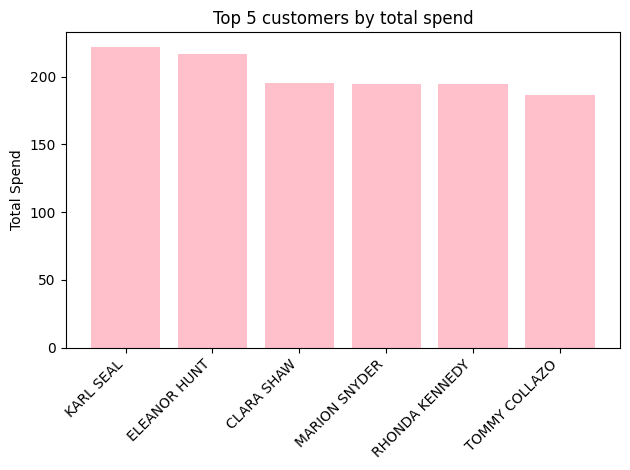

In [120]:
import matplotlib.pyplot as plt

df = top5_winners[['customer_name','total_spend']]
x = range(len(df))

plt.bar(x, df['total_spend'], color = 'pink')
plt.xticks(x, df['customer_name'], rotation = 45, ha = 'right', color = 'black')
plt.ylabel('Total Spend')
plt.title('Top 5 customers by total spend')
plt.tight_layout()
plt.show()

### B1) How much money does each film category bring in? 
Make a bar chart showing total revenue per film category.

This result will show which genres to increase to add more revenue

- Aggregate payments to films and then attribute each film’s revenue to its genre. 
- Join payment -> rental -> inventory -> film -> film_category -> category, 
- Sum the payment amounts per genre
- Sort the result by the revenue total in descending order.

In [116]:
top_genre_revenue = duckdb.sql("""
SELECT
    c.name AS genre,
    ROUND(SUM(p.amount), 2) AS revenue
FROM payment p
JOIN rental r ON p.rental_id = r.rental_id
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
JOIN film_category fc ON fc.film_id = f.film_id
JOIN category c ON c.category_id = fc.category_id
GROUP BY c.name
ORDER BY revenue DESC;
""").df()

top_genre_revenue.index = range(1, len(top_genre_revenue) + 1)
top_genre_revenue

,genre,revenue
1,Sports,5314.21
2,Sci-Fi,4756.98
3,Animation,4656.30
4,Drama,4587.39
5,Comedy,4383.58
6,Action,4375.85
7,New,4351.62
8,Games,4281.33
9,Foreign,4270.67
10,Family,4226.07


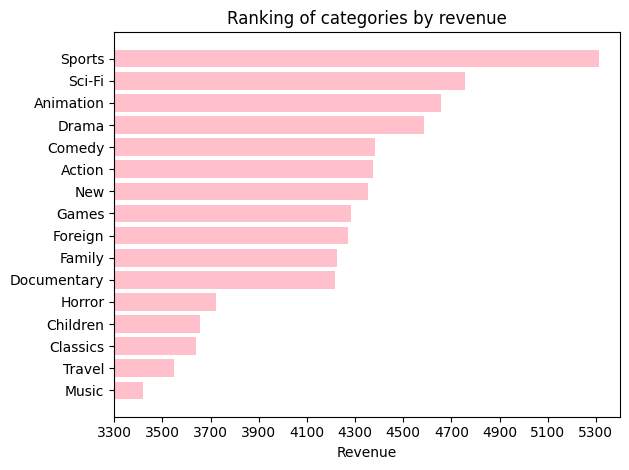

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# .copy() is used to avoid SettingWithCopyWarning
# .sort_values() to sort by revenue for better visualization
df = top_genre_revenue[['genre', 'revenue']].copy().sort_values('revenue')

# Create horizontal bar chart
fig, ax = plt.subplots()
ax.barh(df['genre'], df['revenue'], color='pink')
ax.set_xlabel('Revenue')
ax.set_title('Ranking of categories by revenue')

# Set x-axis limits and ticks
ax.set_xlim(3300, 5400)
ax.set_xticks(np.arange(3300, 5400, 200))

# Adjust layout and show plot
fig.tight_layout()
plt.show()

### B2) EDAInventory: Most number of films per genre
Tables/cols: film -> film_category -> category

In [ ]:
# Final Query: Check how many films there are per genre
duckdb.sql("""
SELECT
    fl.category,
    COUNT(*) AS film_count
FROM film_list AS fl
GROUP BY fl.category
ORDER BY film_count DESC, category;
""").df()

,category,film_count
0,Sports,441
1,Foreign,397
2,Documentary,385
3,Action,363
4,Animation,361
5,Drama,350
6,Family,347
7,Children,344
8,New,343
9,Sci-Fi,326


----------------------------------------------------------------------------------------------------------------------------------------------

# 